In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
%matplotlib inline

In [2]:
def read_from_url(url):
    """Read pandas time series from *source_url*."""
    return pd.read_csv(url, converters={0: pd.to_datetime}, index_col=0)

def get_frame(freq):
    url = f'http://minikep-db.herokuapp.com/api/frame?freq={freq}'
    return read_from_url(url)

In [3]:
annual, quarterly, monthly, daily = [get_frame(f) for f in 'aqmd']

In [4]:
annual.head().transpose()

,1999-12-31 00:00:00,2000-12-31 00:00:00,2001-12-31 00:00:00,2002-12-31 00:00:00,2003-12-31 00:00:00
CPI_ALCOHOL_rog,143.2,125.0,112.6,108.9,109.9
CPI_FOOD_rog,135.0,117.1,117.8,111.3,110.2
CPI_NONFOOD_rog,139.2,118.5,112.7,110.9,109.2
CPI_rog,136.5,120.2,118.6,115.1,112.0
CPI_SERVICES_rog,134.0,133.7,136.9,136.2,122.3
EXPORT_GOODS_bln_usd,75.6,105.0,101.9,107.3,135.9
GDP_bln_rub,4823.0,7306.0,8944.0,10831.0,13208.0
GDP_yoy,106.4,110.0,105.1,104.7,107.3
GOV_EXPENSE_ACCUM_CONSOLIDATED_bln_rub,1258.0,1960.1,2419.4,3422.3,3964.9
GOV_EXPENSE_ACCUM_FEDERAL_bln_rub,666.9,1029.2,1321.9,2054.2,2358.6


# Annual missing values

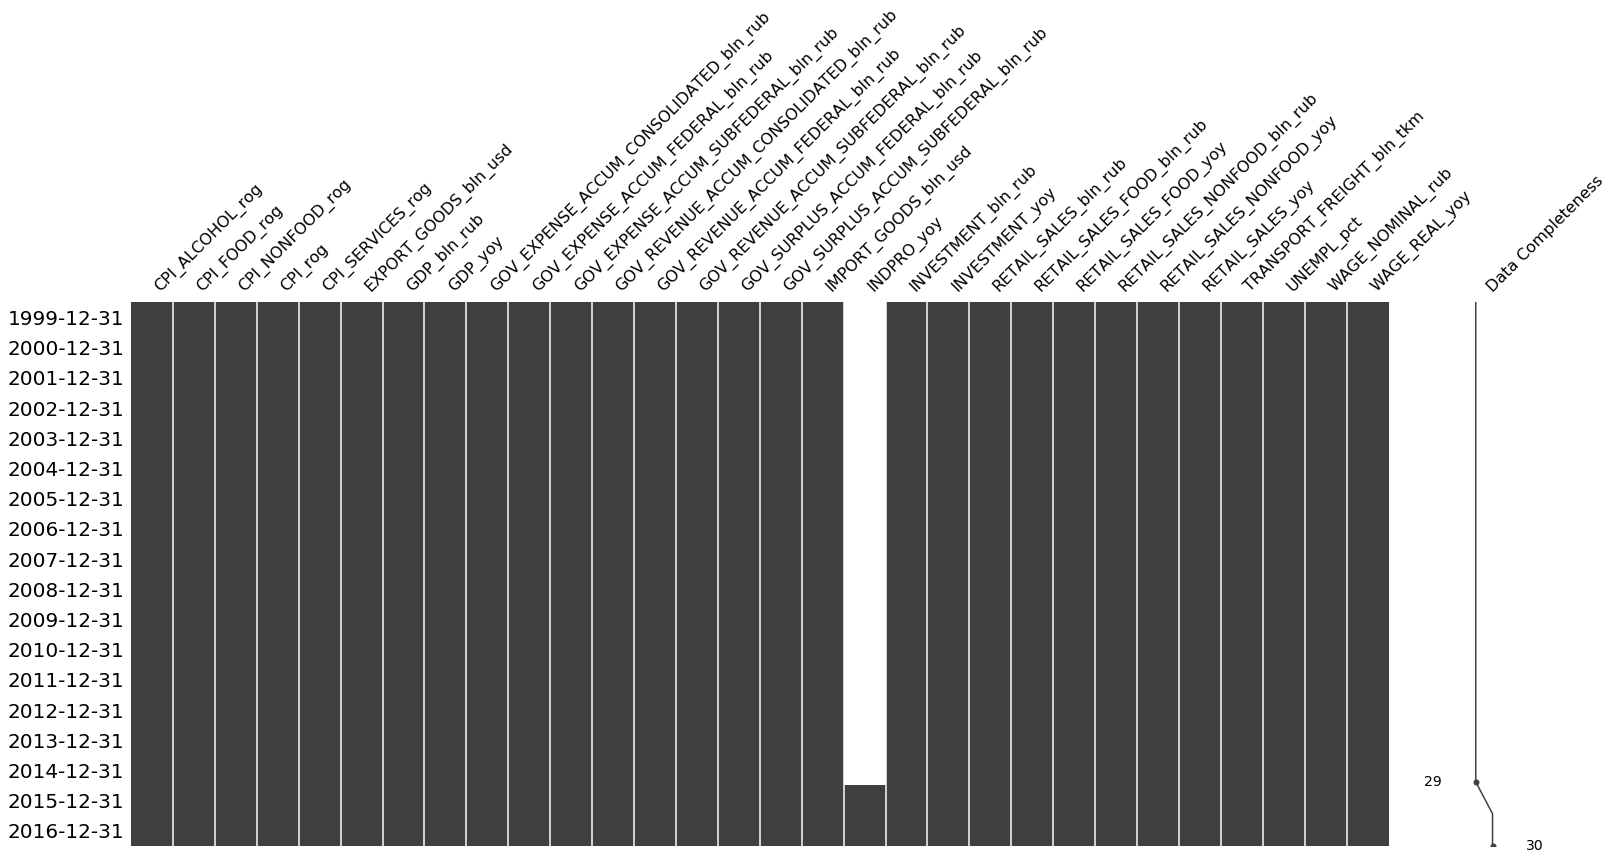

In [5]:
msno.matrix(annual, freq='A', labels=True)

# Quarterly missing values

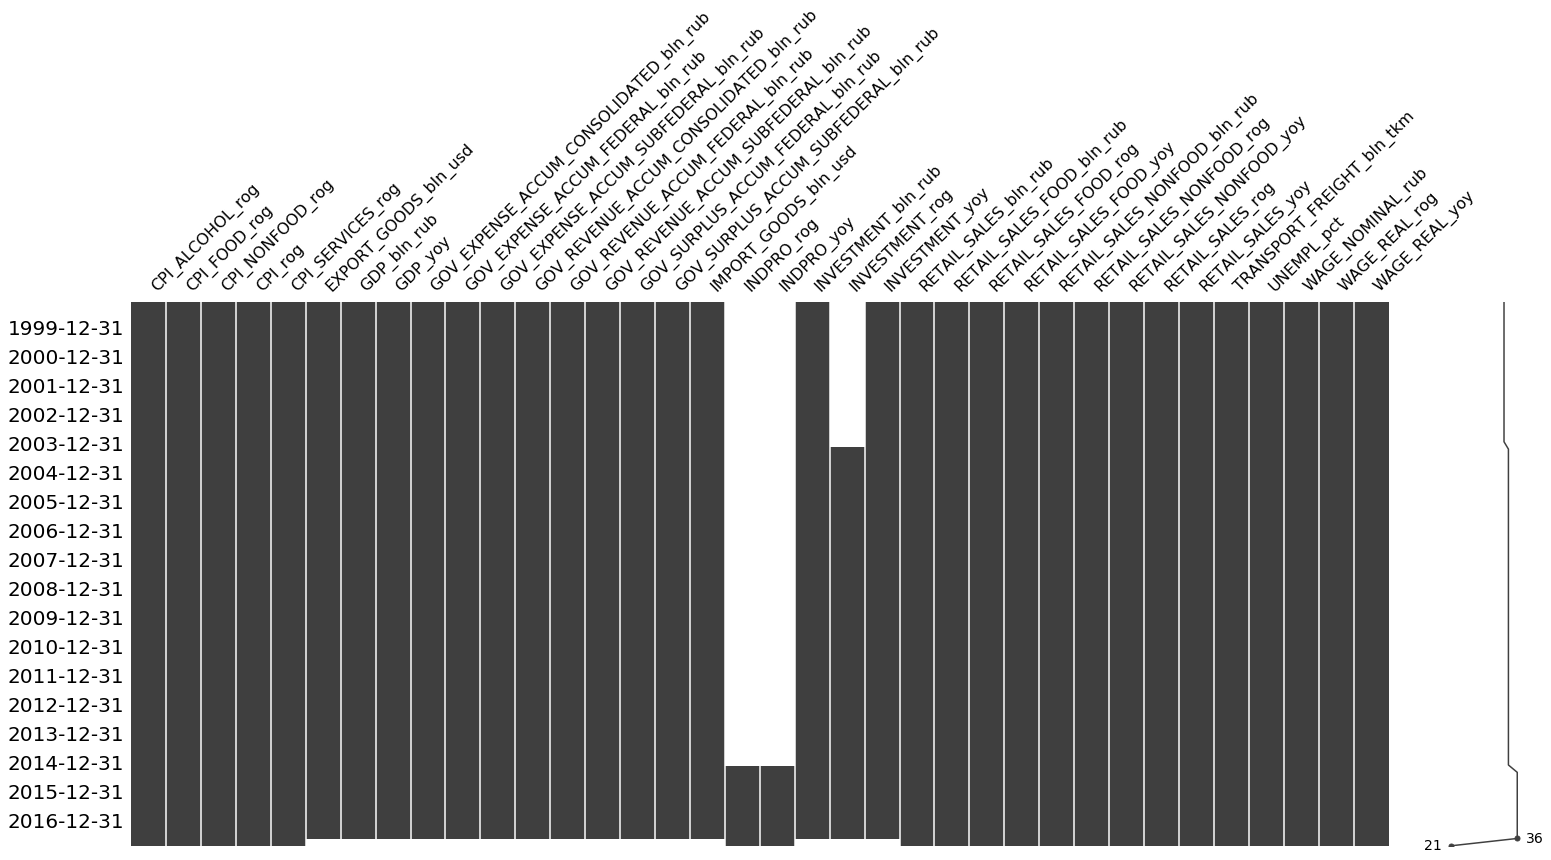

In [6]:
msno.matrix(quarterly, freq='A')

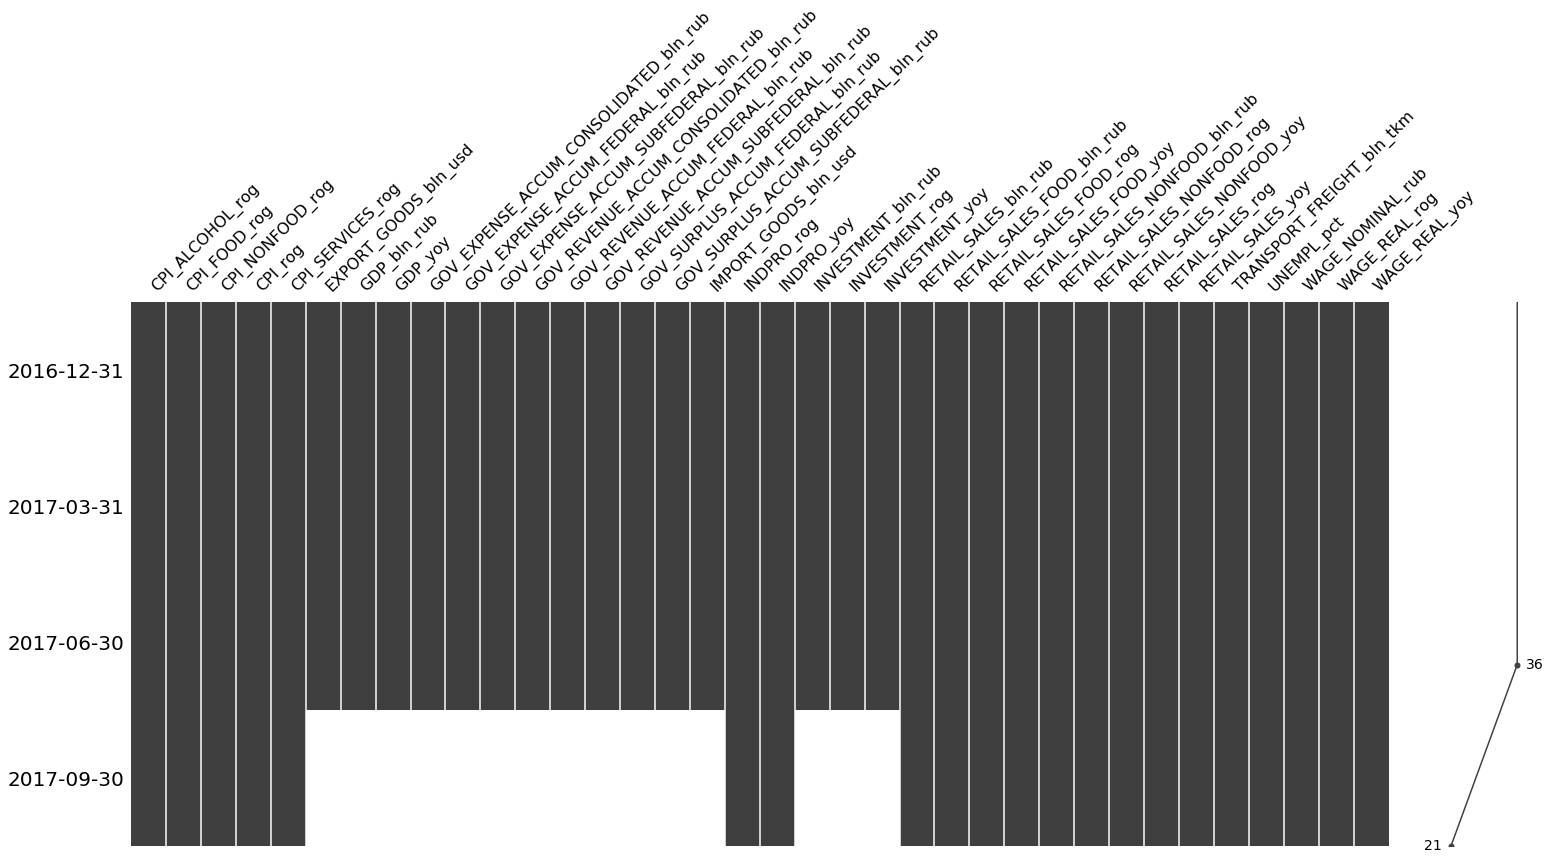

In [7]:
# Zoom in on the most recent dates
msno.matrix(quarterly.iloc[-4:,:], freq='Q')

# Monthly missing values

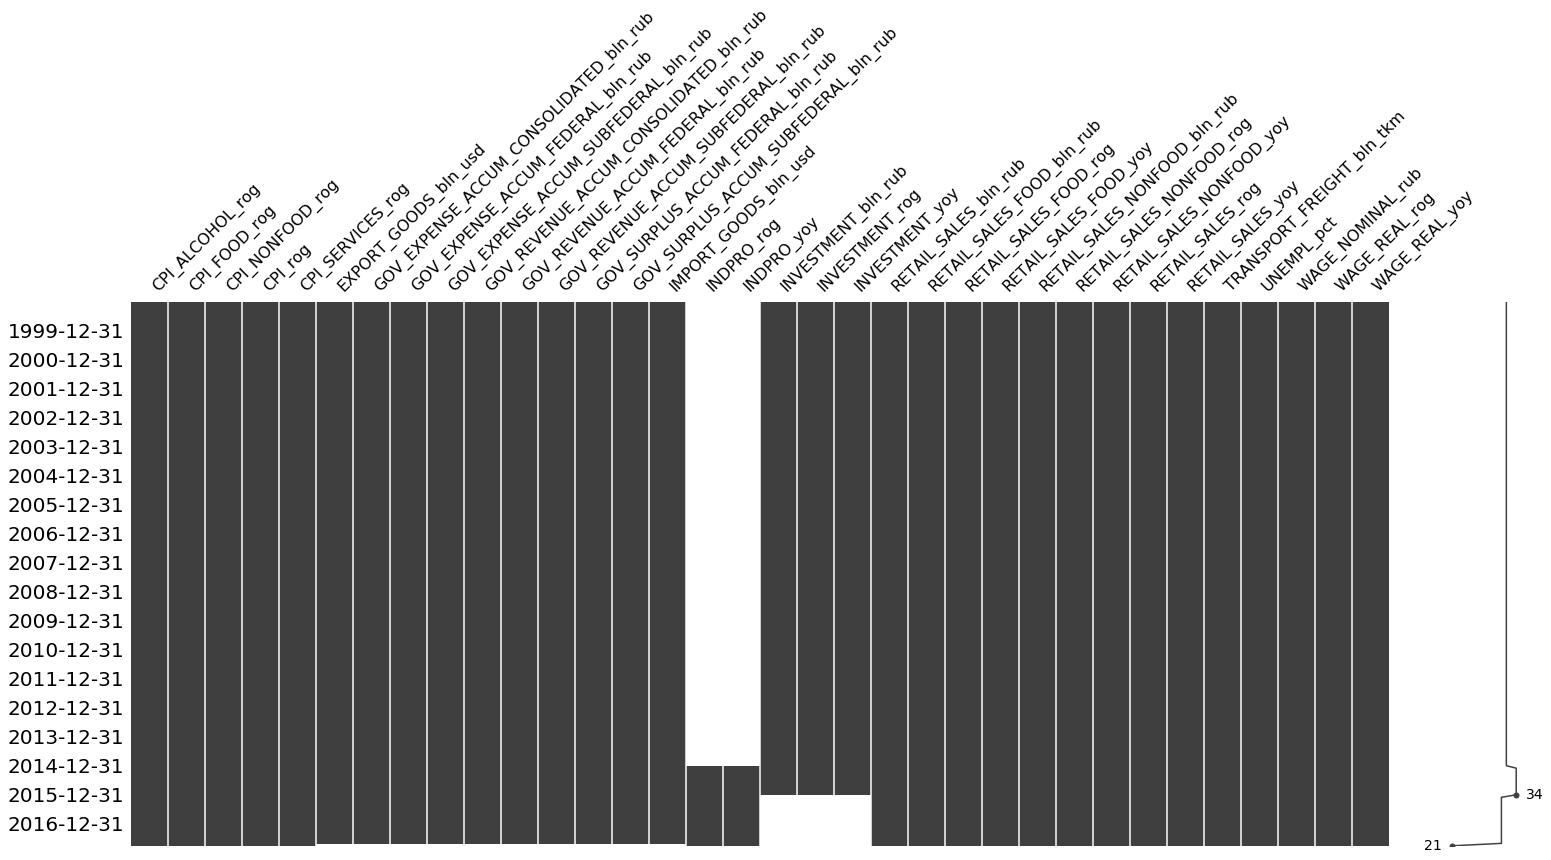

In [8]:
msno.matrix(monthly, freq='A')

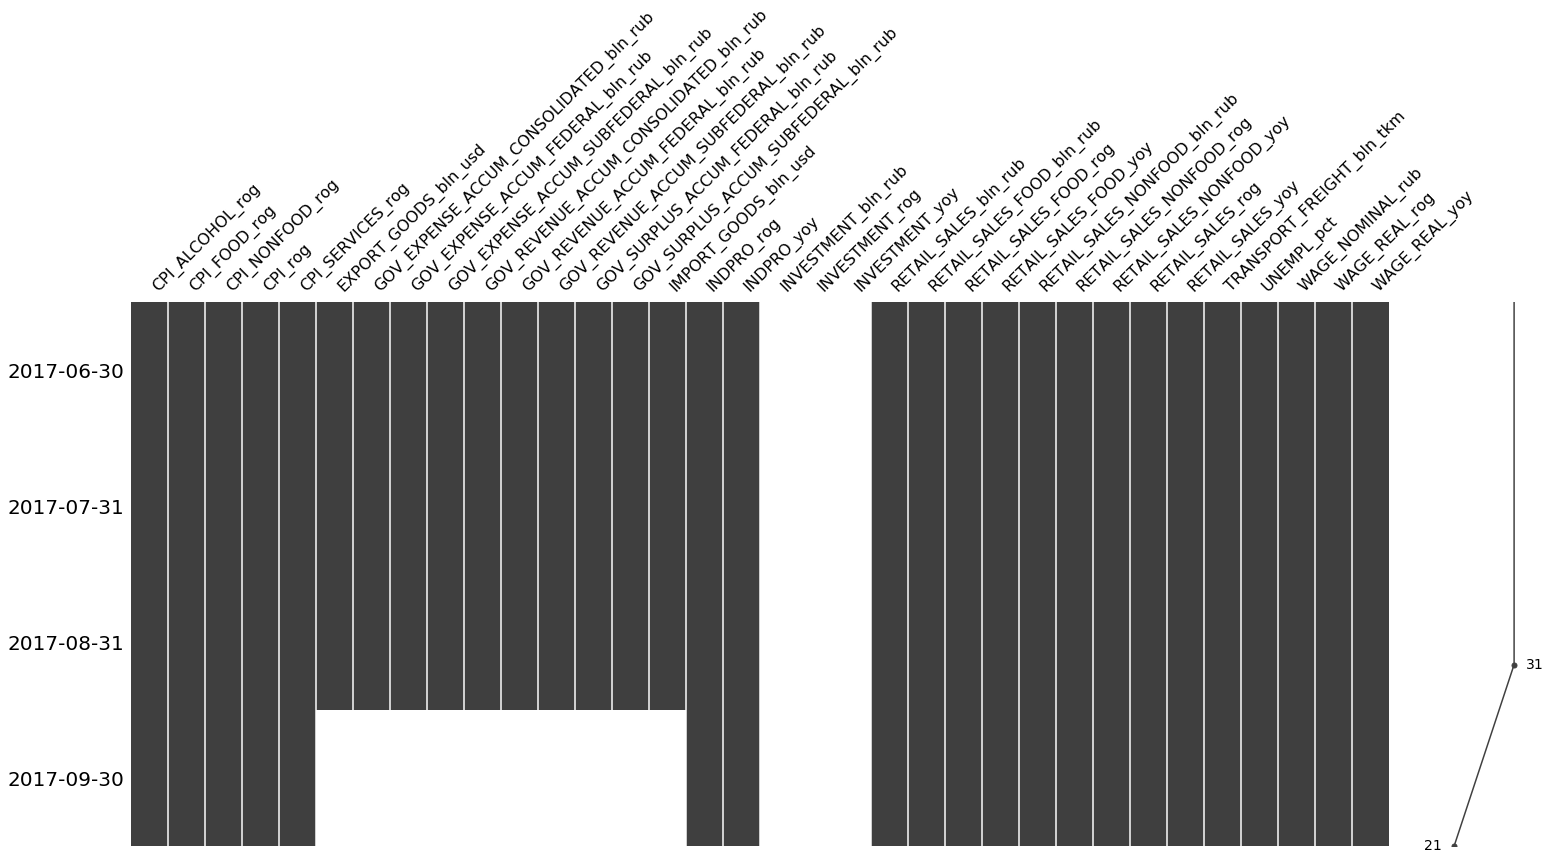

In [9]:
# Zoom in on the most recent dates
msno.matrix(monthly.iloc[-4:,:], freq='M')

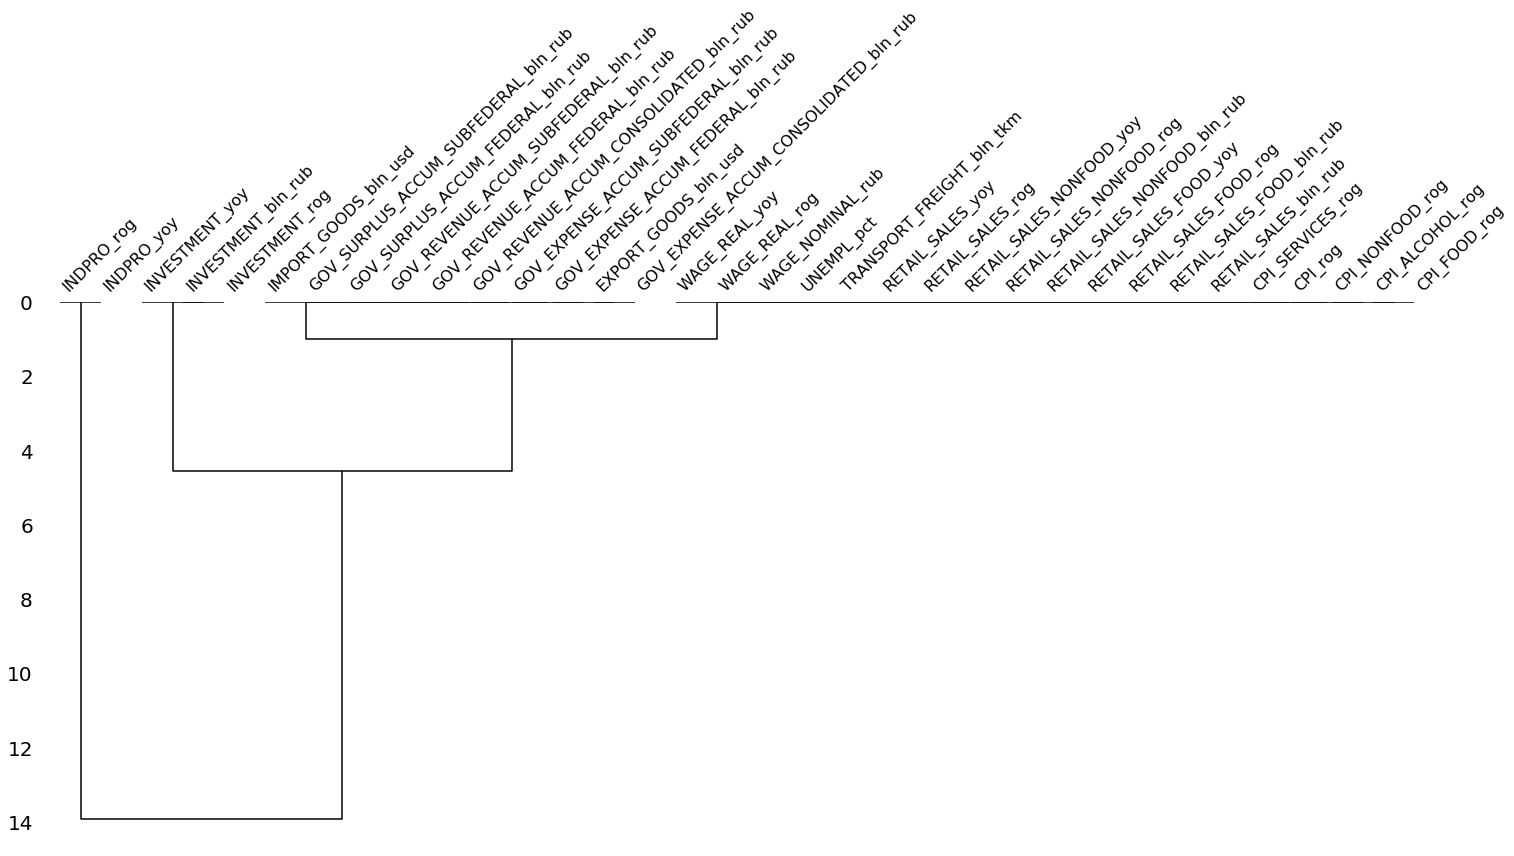

In [10]:
msno.dendrogram(monthly)

# Daily missing values

In [11]:
# Reindex dates to calendar days to avoid KeyError
daily = daily.reindex(index=pd.date_range(daily.index[0], daily.index[-1]))

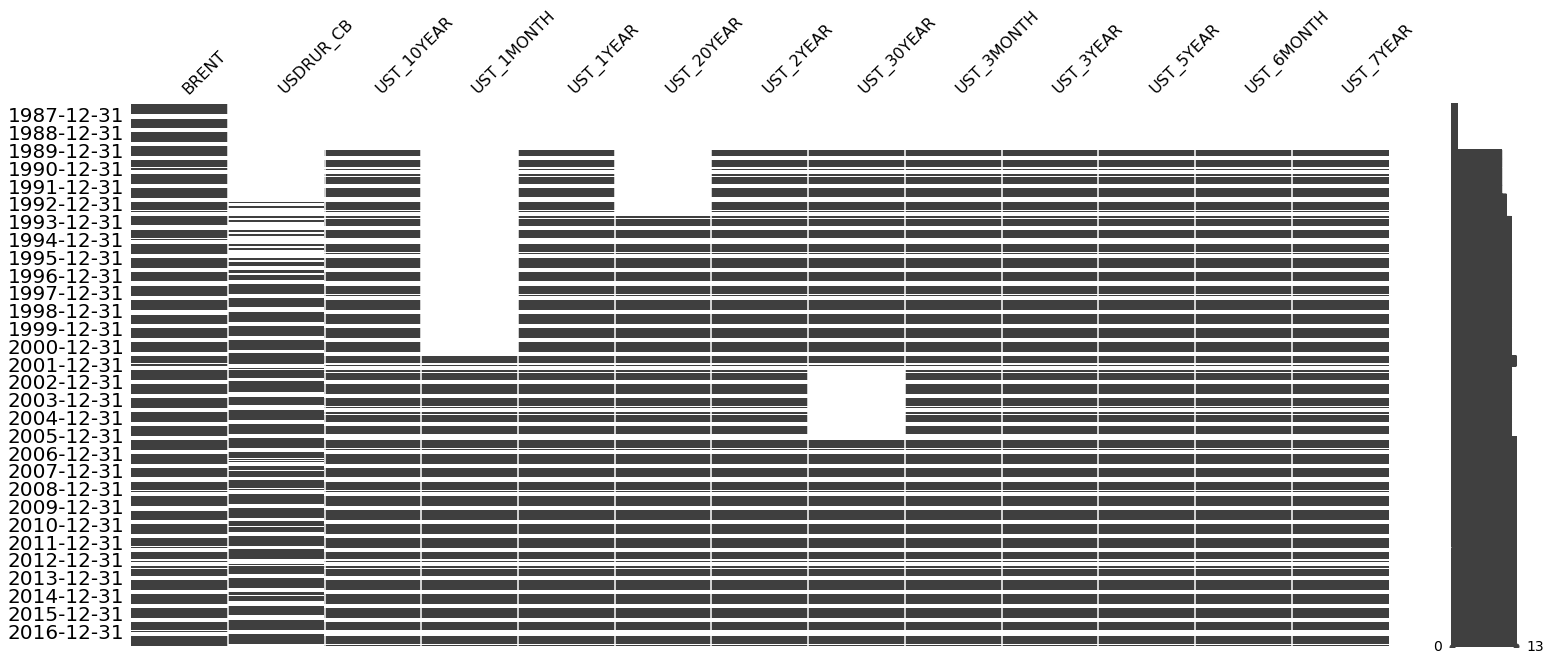

In [12]:
msno.matrix(daily, freq='A')

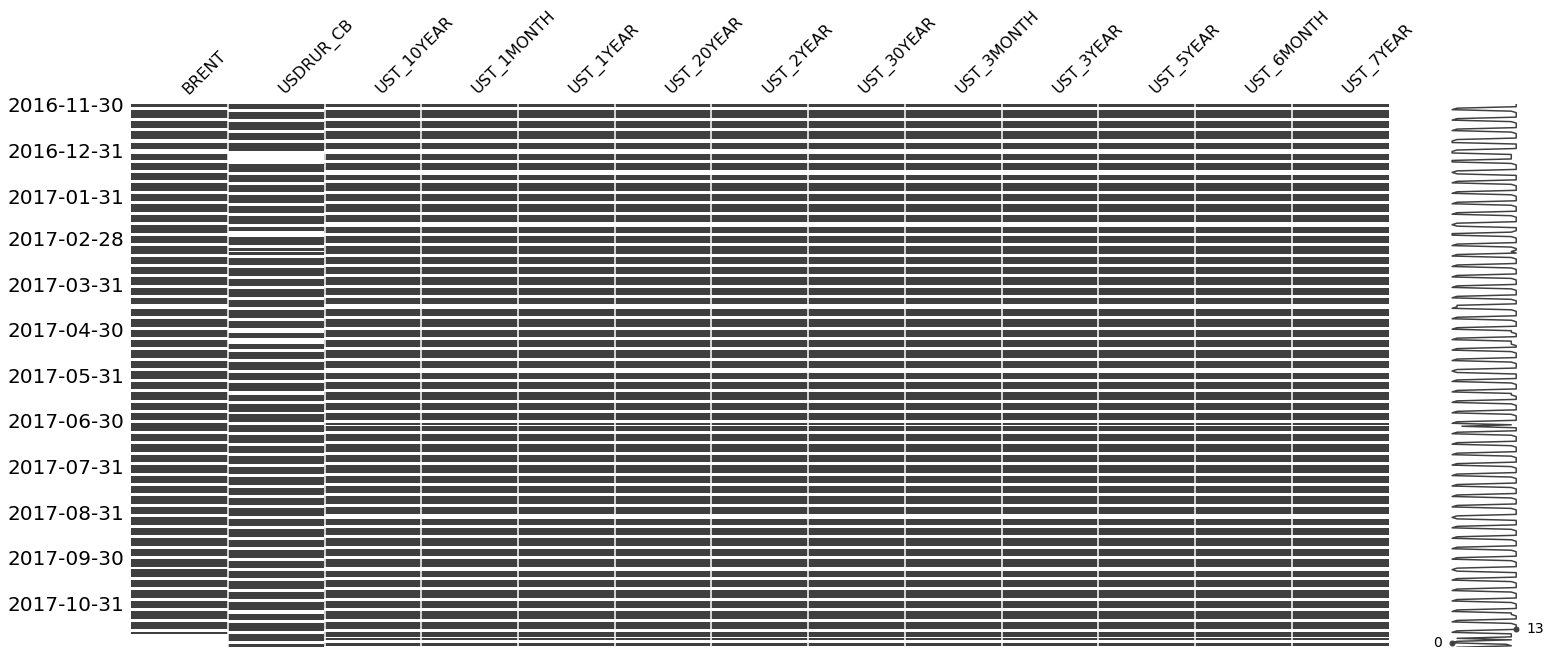

In [13]:
LAST_YEAR_IN_DAYS = -365
msno.matrix(daily[LAST_YEAR_IN_DAYS:], freq='M')

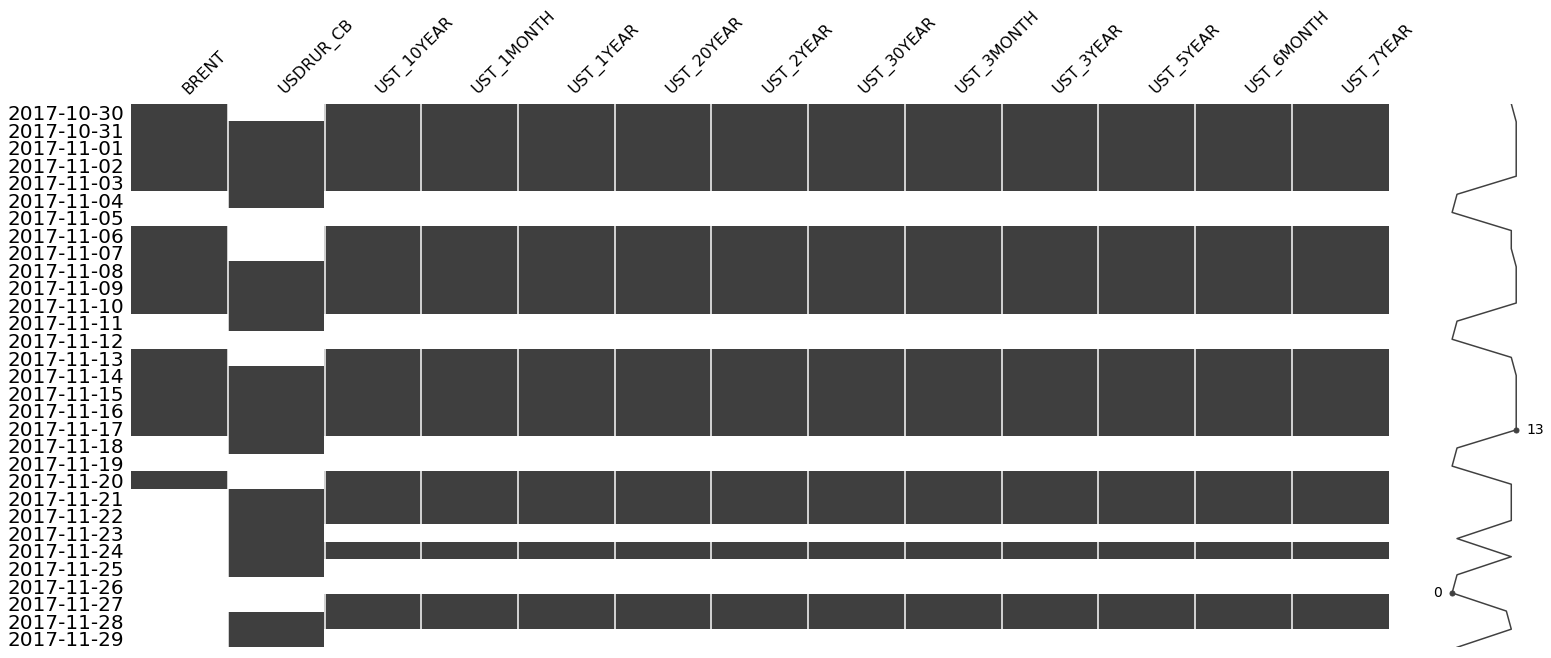

In [14]:
LAST_MONTH_IN_DAYS = -31
msno.matrix(daily[LAST_MONTH_IN_DAYS:], freq='D')

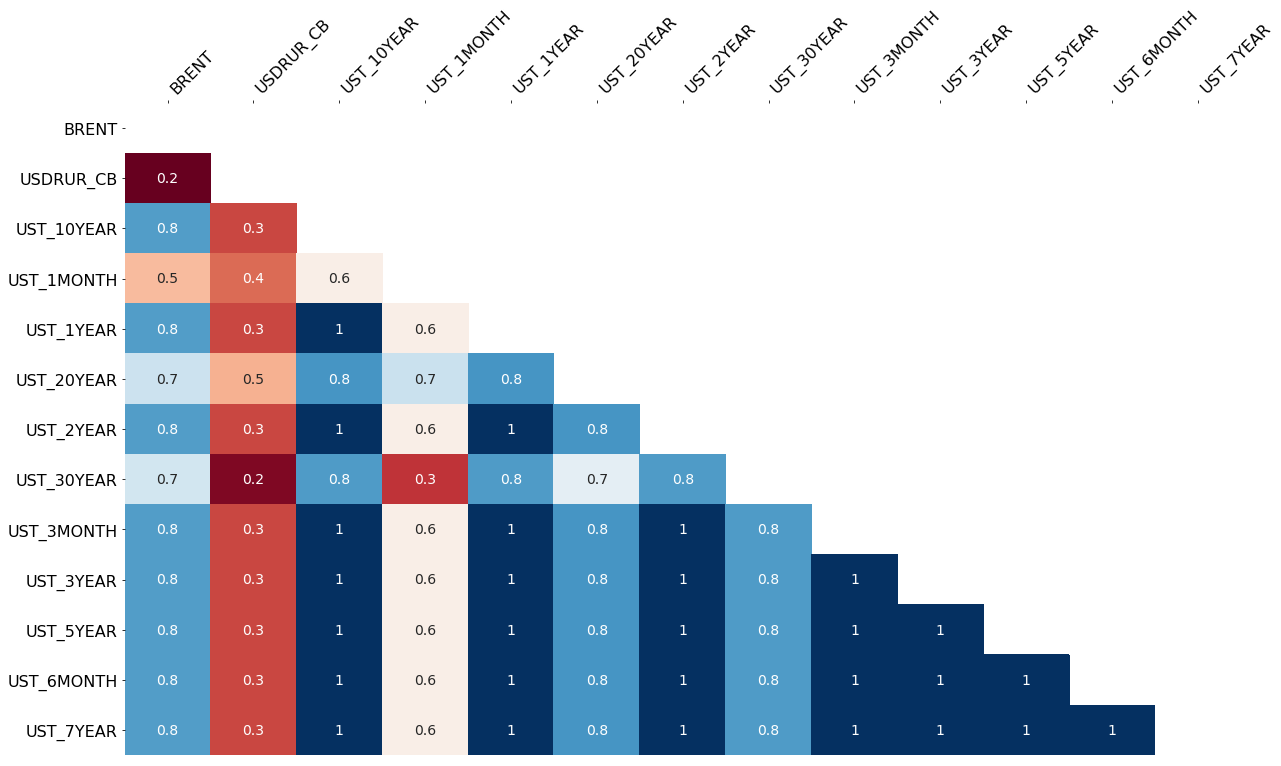

In [15]:
msno.heatmap(daily)